# **Fase de Modelado**

La etapa de modelado tiene como objetivo construir, entrenar y evaluar algoritmos de aprendizaje supervisado capaces de predecir la variable objetivo a partir del conjunto de datos previamente preparado. En esta fase se seleccionan las técnicas de modelado más adecuadas, se ajustan sus parámetros y se valida su desempeño mediante métricas cuantitativas.

Durante esta etapa se desarrollan las siguientes actividades principales:

1. **Selección del modelo:** identificación de los algoritmos más apropiados según la naturaleza del problema, las características del dataset y los objetivos del análisis.

2. **Entrenamiento del modelo:** ajuste de los parámetros internos de cada algoritmo utilizando el conjunto de entrenamiento para aprender los patrones subyacentes en los datos.

3. **Ajuste de hiperparámetros:** optimización de variables externas al modelo mediante técnicas como validación cruzada, grid search o random search, con el fin de mejorar la precisión y la capacidad de generalización.

4. **Evaluación del desempeño:** análisis de métricas como exactitud, precisión, recall, F1-score, matriz de confusión o AUC-ROC para determinar la eficacia predictiva y detectar posibles sesgos.

5. **Comparación de modelos:** contraste del rendimiento entre diferentes algoritmos para seleccionar la opción más robusta y estable.

6. **Validación final:** comprobación del modelo seleccionado utilizando el conjunto de prueba, garantizando que su rendimiento sea consistente y no esté afectado por sobreajuste.

Esta etapa permite obtener un modelo predictivo confiable, optimizado y validado, capaz de generalizar adecuadamente a nuevos datos y aportar valor en la toma de decisiones basada en aprendizaje automático.

In [1]:
# 1. Gestión de Librerias
import pandas as pd
import numpy as np

In [2]:
# 2. Carga del dataset desde su fuente
url = "https://github.com/aperezn298/CienciaDatosSENA/raw/refs/heads/main/04Datasets/hepatitis_processing.xlsx"
dataset = pd.read_excel(url)

dataset.head()

,Age,Sex,Estado_Civil,Ciudad,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver_Big,...,Spiders,Ascites,Varices,Bilirubin,Alk_Phosphate,Sgot,Albumin,Protime,Histology,Class
0,-1.175998,-3.791438,0.615075,1.639107,-0.956771,0.460242,1.811474,1.111732,0.652871,-2.862065,...,1.002974,0.618604,0.533398,-0.537257,-0.426177,-1.256193,0.663224,0.999303,-0.9759,2
1,0.585850,0.263752,-1.186216,-1.370000,-0.956771,0.460242,-0.587229,1.111732,0.652871,-2.862065,...,1.002974,0.618604,0.533398,-0.635752,1.337828,-0.584842,-0.251901,0.999303,-0.9759,2
2,3.052437,0.263752,-0.285571,0.435464,1.202104,0.460242,-0.587229,1.111732,0.652871,0.358574,...,1.002974,0.618604,0.533398,-0.832743,-0.038096,-0.864572,0.663224,0.999303,-0.9759,2
3,-1.087905,0.263752,1.515721,-0.768179,1.202104,-2.172770,1.811474,1.111732,0.652871,0.358574,...,1.002974,0.618604,0.533398,-0.832743,-1.802102,-0.305112,0.663224,0.999303,-0.9759,2
4,-0.823628,0.263752,0.615075,-0.166357,1.202104,0.460242,1.811474,1.111732,0.652871,0.358574,...,1.002974,0.618604,0.533398,-0.537257,-0.426177,-0.221193,0.663224,0.999303,-0.9759,2


### Act 01 - **Selección del Modelo**

In [3]:
# 1. Separar las características y la variable objetivo
X = dataset.drop("Class", axis=1)
y = dataset["Class"]

In [4]:
# 2. Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**random_state** es un parámetro que controla la aleatoriedad interna de un modelo o de un proceso en scikit-learn.
Su función es fijar una semilla (seed) para que los resultados que dependen del azar puedan reproducirse exactamente cada vez que se ejecuta el código.

In [5]:
# 3. Definición de clasificadores

# Importar los clasificadores desde scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier

# Definir una semilla aleatoria para reproducibilidad
RANDOM_SEED = 42

# Crear un diccionario de clasificadores
classifiers = {
    'LogisticRegression': LogisticRegression(random_state=RANDOM_SEED),
    'SVC': SVC(random_state=RANDOM_SEED),
    'KNN': KNeighborsClassifier(),
    'DecisionTree': DecisionTreeClassifier(random_state=RANDOM_SEED),
    'RandomForest': RandomForestClassifier(random_state=RANDOM_SEED),
    'GradientBoosting': GradientBoostingClassifier(random_state=RANDOM_SEED),
    'ExtraTrees': ExtraTreeClassifier(random_state=RANDOM_SEED),
    'NaiveBayes': GaussianNB(),
}

### Act 02 - **Entrenamiento de los Modelos**

In [6]:
# 4. Entrenamiento con validacion cruzada y evaluación de los modelos

# Importar las funciones necesarias para la validación cruzada
from sklearn.model_selection import cross_validate
# Definir métricas de evaluación
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score

# Definir las métricas de evaluación
scoring = {'accuracy': 'accuracy',
           'precision': make_scorer(precision_score, average='binary'),
           'recall': make_scorer(recall_score, average='binary'),
           'f1': make_scorer(f1_score, average='binary')
        }

# Almacenar los resultados
results = {}

# Evaluar cada clasificador usando validación cruzada
for name, clf in classifiers.items():
    scores = cross_validate(clf, X_train, y_train, cv=10, scoring=scoring, n_jobs=-1, return_train_score=False)
    metric_means = {
        f"{m.replace('test_','')}_mean": np.mean(v)
        for m, v in scores.items() if m.startswith("test_")
    }
    metric_stds = {
        f"{m.replace('test_','')}_std": np.std(v)
        for m, v in scores.items() if m.startswith("test_")
    }

    results[name] = {**metric_means, **metric_stds}

# Mostrar los resultados
results_df = pd.DataFrame(results).T
results_df

,accuracy_mean,precision_mean,recall_mean,f1_mean,accuracy_std,precision_std,recall_std,f1_std
LogisticRegression,0.995000,0.990000,1.000000,0.994737,0.015000,0.030000,0.000000,0.015789
SVC,0.995000,0.990000,1.000000,0.994737,0.015000,0.030000,0.000000,0.015789
KNN,0.928947,0.893776,0.980000,0.930156,0.055799,0.092855,0.060000,0.052153
DecisionTree,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
RandomForest,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
GradientBoosting,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
ExtraTrees,0.918158,0.922045,0.914444,0.913663,0.048115,0.083208,0.079512,0.050828
NaiveBayes,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000


In [7]:
# Entrenamiento Final de los Modelos
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    print(f"{name} entrenado con éxito.")

LogisticRegression entrenado con éxito.
SVC entrenado con éxito.
KNN entrenado con éxito.
DecisionTree entrenado con éxito.
RandomForest entrenado con éxito.
GradientBoosting entrenado con éxito.
ExtraTrees entrenado con éxito.
NaiveBayes entrenado con éxito.


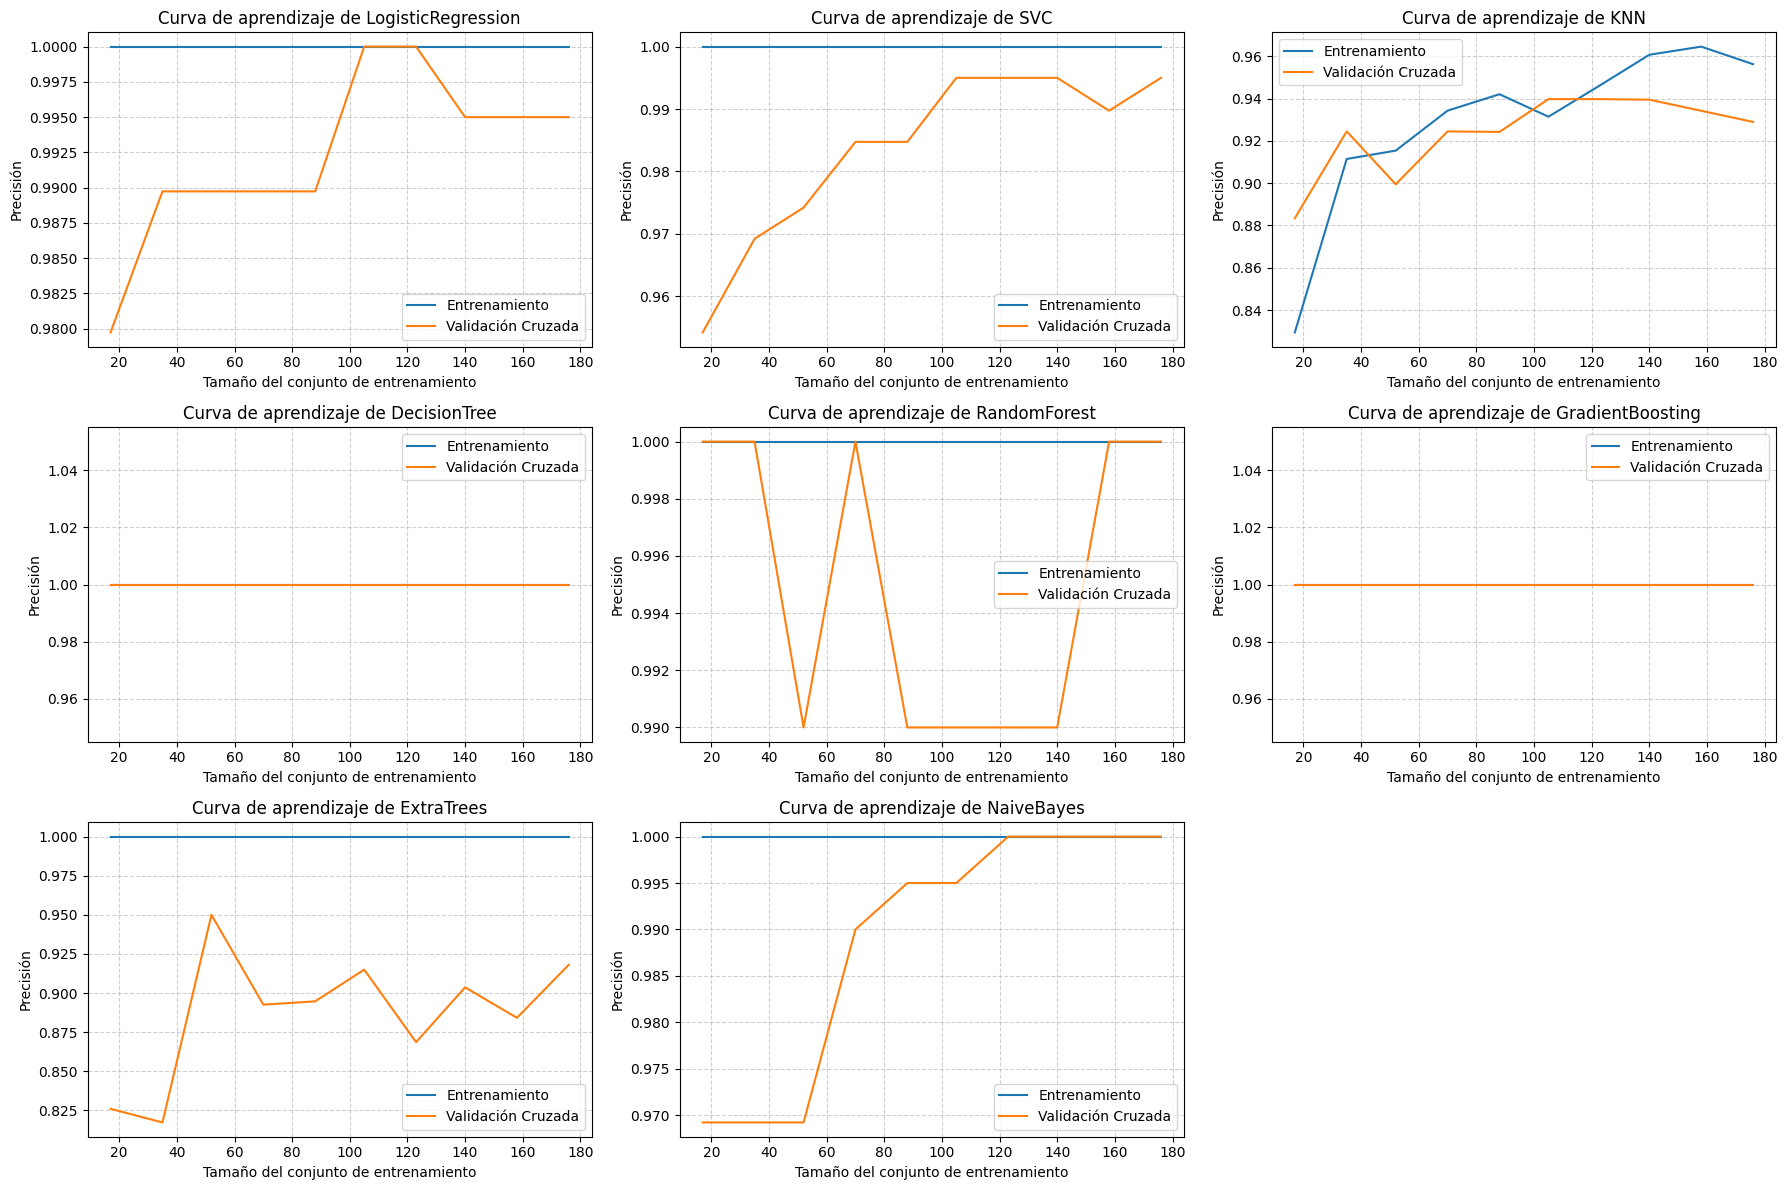

In [8]:
# Curva de aprendizaje del entrenamiento vs validación cruzada
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

n = len(classifiers)
cols = 3
rows = (n // cols) + int(n % cols > 0)

fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 4))
axes = axes.flatten()

for i, (name, clf) in enumerate(classifiers.items()):
    train_sizes, train_scores, valid_scores = learning_curve(
         clf, X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1,
         train_sizes=np.linspace(0.1, 1.0, 10))

    train_scores = np.mean(train_scores, axis=1)
    valid_scores = np.mean(valid_scores, axis=1)

    ax = axes[i]

    ax.plot(train_sizes, train_scores, label='Entrenamiento')
    ax.plot(train_sizes, valid_scores, label='Validación Cruzada')
    ax.set_xlabel('Tamaño del conjunto de entrenamiento')
    ax.set_ylabel('Precisión')
    ax.set_title(f'Curva de aprendizaje de {name}')
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.6)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [9]:
# Evaluación de todos los modelos en el conjunto de entrenamiento
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Guardar los resultados de evaluación
train_results = {}

for i, (name, clf) in enumerate(classifiers.items()):
    y_train_pred = clf.predict(X_train)

    train_results[name] = {
        'accuracy': accuracy_score(y_train, y_train_pred),
        'precision': precision_score(y_train, y_train_pred, average='binary'),
        'recall': recall_score(y_train, y_train_pred, average='binary'),
        'f1': f1_score(y_train, y_train_pred, average='binary')
    }

train_results_df = pd.DataFrame(train_results).T
train_results_df

,accuracy,precision,recall,f1
LogisticRegression,1.000000,1.000000,1.0,1.000000
SVC,1.000000,1.000000,1.0,1.000000
KNN,0.954082,0.911765,1.0,0.953846
DecisionTree,1.000000,1.000000,1.0,1.000000
RandomForest,1.000000,1.000000,1.0,1.000000
GradientBoosting,1.000000,1.000000,1.0,1.000000
ExtraTrees,1.000000,1.000000,1.0,1.000000
NaiveBayes,1.000000,1.000000,1.0,1.000000


In [10]:
# Evaluación de todos los modelos en el conjunto de prueba

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Guardar los resultados de evaluación
test_results = {}

for i, (name, clf) in enumerate(classifiers.items()):
    y_test_pred = clf.predict(X_test)

    test_results[name] = {
        'accuracy': accuracy_score(y_test, y_test_pred),
        'precision': precision_score(y_test, y_test_pred, average='binary'),
        'recall': recall_score(y_test, y_test_pred, average='binary'),
        'f1': f1_score(y_test, y_test_pred, average='binary')
    }

test_results_df = pd.DataFrame(test_results).T
test_results_df

,accuracy,precision,recall,f1
LogisticRegression,1.00,1.000000,1.000000,1.000000
SVC,1.00,1.000000,1.000000,1.000000
KNN,0.96,0.937500,1.000000,0.967742
DecisionTree,1.00,1.000000,1.000000,1.000000
RandomForest,1.00,1.000000,1.000000,1.000000
GradientBoosting,1.00,1.000000,1.000000,1.000000
ExtraTrees,0.96,0.966667,0.966667,0.966667
NaiveBayes,1.00,1.000000,1.000000,1.000000


In [11]:
# Determinar si hay sobreajuste o subajuste para cada modelo
overfitting_results = {}

for name in classifiers.keys():
    train_acc = train_results_df.loc[name, 'accuracy']
    test_acc = test_results_df.loc[name, 'accuracy']

    if train_acc > test_acc + 0.05:
        status = 'Sobreajuste'
    elif test_acc > train_acc + 0.05:
        status = 'Subajuste'
    else:
        status = 'Aprendizaje estable'

    overfitting_results[name] = status

overfitting_df = pd.DataFrame(overfitting_results.items(), columns=['Modelo', 'Estado'])
overfitting_df

,Modelo,Estado
0,LogisticRegression,Aprendizaje estable
1,SVC,Aprendizaje estable
2,KNN,Aprendizaje estable
3,DecisionTree,Aprendizaje estable
4,RandomForest,Aprendizaje estable
5,GradientBoosting,Aprendizaje estable
6,ExtraTrees,Aprendizaje estable
7,NaiveBayes,Aprendizaje estable


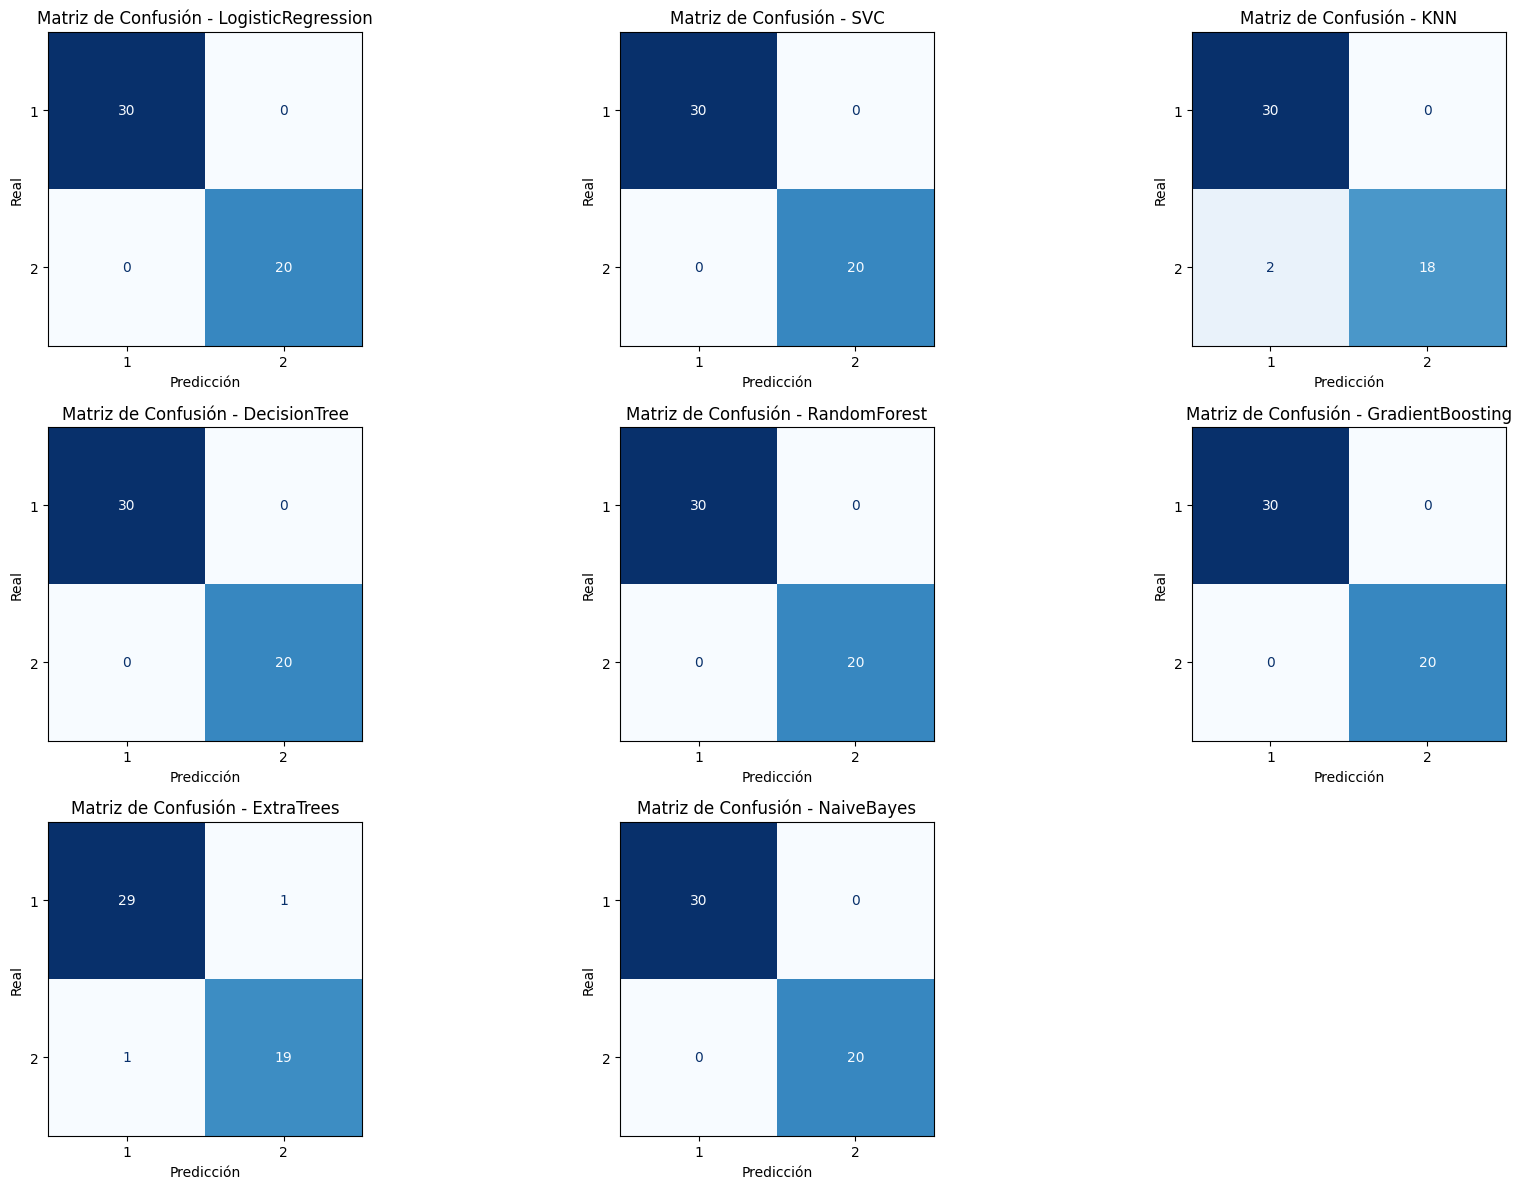

In [12]:
# Matriz de confusión para todos los modelos
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

n = len(classifiers)
cols = 3
rows = (n // cols) + int(n % cols > 0)

fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 4))
axes = axes.flatten()

for i, (name, clf) in enumerate(classifiers.items()):
    y_test_pred = clf.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_test_pred)

    ax = axes[i]
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=clf.classes_)
    disp.plot(ax=ax, cmap='Blues', colorbar=False)  # ¡Usar el eje del subplot!
    ax.set_title(f'Matriz de Confusión - {name}')
    ax.set_xlabel('Predicción')
    ax.set_ylabel('Real')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [16]:
# Determinar cual es el mejor modelo basado en la comparacion de precisión entre train y test
best_model = None
best_accuracy_diff = float('inf')

# Almacenar las diferencias de precisión
accuracy_diffs = {}

for name, clf in classifiers.items():
    train_accuracy = clf.score(X_train, y_train)
    test_accuracy = clf.score(X_test, y_test)
    accuracy_diff = abs(train_accuracy - test_accuracy)
    accuracy_diffs[name] = accuracy_diff
    if accuracy_diff < best_accuracy_diff:
        best_accuracy_diff = accuracy_diff
        best_model = name
        best_clf = clf

print(f"Mejor modelo: {best_model} con una diferencia de precisión de {best_accuracy_diff:.4f}")

# Mostrar las diferencias de precisión
for name, diff in accuracy_diffs.items():
    print(f"Diferencia de precisión - {name}: {diff:.4f}")

Mejor modelo: LogisticRegression con una diferencia de precisión de 0.0000
Diferencia de precisión - LogisticRegression: 0.0000
Diferencia de precisión - SVC: 0.0000
Diferencia de precisión - KNN: 0.0059
Diferencia de precisión - DecisionTree: 0.0000
Diferencia de precisión - RandomForest: 0.0000
Diferencia de precisión - GradientBoosting: 0.0000
Diferencia de precisión - ExtraTrees: 0.0400
Diferencia de precisión - NaiveBayes: 0.0000


In [17]:
# Reporte detallado del mejor modelo
from sklearn.metrics import classification_report

y_test_pred_best = best_clf.predict(X_test)
print(f"Reporte de clasificación para el mejor modelo: {best_model}")
print(classification_report(y_test, y_test_pred_best))

Reporte de clasificación para el mejor modelo: LogisticRegression
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00        20

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [18]:
# Guardar el modelo
import joblib

joblib.dump(best_clf, 'mejor_modelo_hepatitis.pkl')

['mejor_modelo_hepatitis.pkl']